# **Proyecto Final — Data Sciense I**




---



**Autora:** Mercedes Brito

**Dataset:** IATI – Datos de financiamiento para desarrollo

**Variable objetivo (y)**: Value (USD) (Desembolso, Gasto)

**Tipo de modelo:** Regresión

# **1. Introducción**




---



La cooperación internacional para el desarrollo moviliza cada año miles de millones de dólares destinados a financiar proyectos que buscan mejorar las condiciones sociales, económicas y ambientales de distintos países. Sin embargo, la distribución de estos recursos no es homogénea: depende de factores estratégicos, geopolíticos, sectoriales y temporales que influyen directamente en cuánto dinero recibe cada iniciativa.

En este marco, contar con herramientas de análisis predictivo permite comprender de manera más profunda cómo se asignan los recursos y qué variables influyen en los montos desembolsados. La ciencia de datos ofrece metodologías que permiten transformar grandes volúmenes de información en conocimiento útil para la toma de decisiones, especialmente cuando se trabaja con bases complejas como las del International Aid Transparency Initiative (IATI).

El objetivo de este proyecto es aplicar técnicas de modelización para predecir el monto desembolsado en cada proyecto, utilizando como base un conjunto de datos reales provenientes de iniciativas de desarrollo. Mediante la selección adecuada de variables, la construcción de modelos de regresión y la evaluación de métricas de desempeño, este trabajo busca aportar valor analítico para mejorar procesos de planificación y priorización dentro del ámbito de la cooperación internacional.


# **2. Abstract**




---

El presente proyecto tiene como objetivo desarrollar un modelo de regresión capaz de predecir el monto desembolsado (Value USD – Desembolso/Gasto) en proyectos de cooperación internacional registrados en la base de datos de IATI. Estos datos representan flujos financieros reales destinados a iniciativas de desarrollo en múltiples sectores y países receptores, y constituyen una fuente relevante para entender prioridades estratégicas, patrones de inversión y tendencias temporales en la ayuda internacional.

Para ello, se realizó un proceso de selección de características que permitió identificar las variables más influyentes en el desembolso: el sector del proyecto, el país o región receptora y el año de inicio. Estas variables combinan información socioeconómica, estratégica y temporal que potencialmente explican la magnitud de los recursos asignados.

Posteriormente se aplicaron dos modelos de regresión: Regresión Lineal (como línea base) y Random Forest Regressor (como modelo no lineal capaz de capturar relaciones más complejas). Ambos modelos fueron entrenados usando un subconjunto del dataset (80%) y evaluados con el 20% restante, lo cual permitió validar su desempeño con métricas estandarizadas como MAE, RMSE y R².

Los resultados obtenidos permiten analizar cómo factores estructurales como el país receptor o el sector de intervención están asociados con montos mayores de inversión, y sientan las bases para futuras aplicaciones prácticas: anticipación de presupuestos, priorización de sectores y análisis de eficiencia en la asignación de recursos. Este proyecto constituye un primer acercamiento a la modelización predictiva en el ámbito del desarrollo internacional, y demuestra que es posible utilizar técnicas de ciencia de datos para mejorar procesos de planificación, transparencia y rendición de cuentas.


# **3. Planteamiento del Problema**




---
La cooperación internacional moviliza grandes montos de financiamiento destinados a proyectos de desarrollo en sectores como salud, educación, gobernanza, infraestructura o asistencia humanitaria. Sin embargo, los montos desembolsados presentan altas variaciones según el país, el sector, el contexto temporal y las prioridades estratégicas de los donantes.

Esta variabilidad dificulta la planificación presupuestaria, la asignación eficiente de recursos y la elaboración de proyecciones financieras confiables. Las organizaciones que reciben o administran estos fondos necesitan anticipar cómo evolucionarán los desembolsos para poder diseñar programas realistas, prever costos operativos y asegurar la continuidad de sus intervenciones.

Pese a que existen registros detallados —como los provistos por IATI— aún no se aprovechan plenamente para modelar y predecir los montos de desembolsos. La pregunta central que guía este proyecto es:

¿Podemos predecir el monto desembolsado en un proyecto de cooperación internacional a partir de características como sector, país receptor y año de inicio?



# **4. Hipótesis**




---
Las siguientes hipótesis guían el análisis y la construcción del modelo predictivo:

H1 — El sector del proyecto influye de manera significativa en el monto desembolsado.

Se espera que sectores como infraestructura, gobernanza o respuesta humanitaria reciban montos mayores debido a su costo operativo y alcance.

H2 — El país o región receptora tiene relación directa con el monto desembolsado.

Los países con mayores necesidades, menor desarrollo humano o situaciones de crisis suelen recibir desembolsos mayores.

H3 — El año de inicio del proyecto es un predictor relevante.

Las prioridades de financiamiento cambian con el tiempo, reflejando crisis, estrategias globales o contextos políticos.

H4 — La combinación de país + sector + año mejora la capacidad predictiva del modelo.

Estas tres variables juntas podrían explicar de manera más robusta la variación en los desembolsos.



# **5. Carga de Librerías**

---




In [3]:
# Librerías básicas
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning y Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# **6. Google Drive**


---



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **7. Lectura Dataset**


---



In [23]:
import pandas as pd

path = '/content/drive/MyDrive/Dataset_iati.xlsx'

df = pd.read_excel(path)

df.head()


,País o región receptores,IATI Identifier,Título de la actividad,Description,Start Date,End Date,Grupo de Organizaciones Notificadoras,Organización notificadora,Tipo de organización notificadora,Tipo de ayuda,...,Multi Country,Categoría de sector,Sector,Humanitarian,Year,Code,Calendar Year and Quarter,Quarter,Value (USD) (Budget),"Value (USD) (Desembolso, Gasto)"
0,CO - Colombia,XM-DAC-918-3-20230938-97540,ENEL COLOMBIA FL,The project will finance investments in sustai...,2024-10-10,2024-11-27,- Ningún dato,XM-DAC-918-3 - Banco Europeo de Inversiones,15 - Otras entidades del sector público,C01 - Intervenciones basadas en proyectos,...,False,- Ningún dato,- Ningún dato,False,2024,2,2024 Q4,Q4,0.0,0.0
1,PE - Perú,44000-P179214,Peru: Enabling a Green and Resilient Developme...,NaN,2023-10-26,2026-11-30,WB - El Grupo del Banco Mundial,44000 - El Banco Mundial,40 - Multilateral,A02 - Apoyo presupuestario sectorial,...,False,- Ningún dato,- Ningún dato,False,2024,3,2024 Q2,Q2,0.0,750000000.0
2,BR - Brasil,XI-IATI-IADB-BR-L1625,PRO-AMAZÔNIA - Programa del BID-BNDES de Acces...,El Objectivo General de Desarrollo es promover...,NaN,NaN,- Ningún dato,XI-IATI-IADB - Banco Interamericano de Desarrollo,40 - Multilateral,C01 - Intervenciones basadas en proyectos,...,False,240 - Servicios bancarios y financieros,24020 - Instituciones monetarias,False,2024,2,2024 Q4,Q4,0.0,0.0
3,CO - Colombia,44000-P181080,Colombia Green and Resilient DPO 2,NaN,2024-03-28,2025-04-30,WB - El Grupo del Banco Mundial,44000 - El Banco Mundial,40 - Multilateral,A02 - Apoyo presupuestario sectorial,...,False,- Ningún dato,- Ningún dato,False,2024,3,2024 Q3,Q3,0.0,750000000.0
4,CO - Colombia,44000-P181080,Colombia Green and Resilient DPO 2,NaN,2024-03-28,2025-04-30,WB - El Grupo del Banco Mundial,44000 - El Banco Mundial,40 - Multilateral,A02 - Apoyo presupuestario sectorial,...,False,- Ningún dato,- Ningún dato,False,2024,2,2024 Q1,Q1,0.0,0.0


# **8. Revisión Inicial**

---



In [45]:
# Info general
print("Shape:", df.shape)
display(df.head())
display(df.columns)
display(df.info())
display(df.describe(include='all').T)

# Conteo de nulos por columna
nulls = df.isnull().sum().sort_values(ascending=False)
display(nulls.head(30))

Shape: (52789, 27)


,País o región receptores,IATI Identifier,Título de la actividad,Description,Start Date,End Date,Grupo de Organizaciones Notificadoras,Organización notificadora,Tipo de organización notificadora,Tipo de ayuda,...,Categoría de sector,Sector,Humanitarian,Year,Code,Calendar Year and Quarter,Quarter,Value (USD) (Budget),"Value (USD) (Desembolso, Gasto)",Start Year
0,CO - Colombia,XM-DAC-918-3-20230938-97540,ENEL COLOMBIA FL,The project will finance investments in sustai...,2024-10-10,2024-11-27,- Ningún dato,XM-DAC-918-3 - Banco Europeo de Inversiones,15 - Otras entidades del sector público,C01 - Intervenciones basadas en proyectos,...,- Ningún dato,- Ningún dato,False,2024,2,2024 Q4,Q4,0.0,0.0,2024
1,PE - Perú,44000-P179214,Peru: Enabling a Green and Resilient Developme...,NaN,2023-10-26,2026-11-30,WB - El Grupo del Banco Mundial,44000 - El Banco Mundial,40 - Multilateral,A02 - Apoyo presupuestario sectorial,...,- Ningún dato,- Ningún dato,False,2024,3,2024 Q2,Q2,0.0,750000000.0,2023
3,CO - Colombia,44000-P181080,Colombia Green and Resilient DPO 2,NaN,2024-03-28,2025-04-30,WB - El Grupo del Banco Mundial,44000 - El Banco Mundial,40 - Multilateral,A02 - Apoyo presupuestario sectorial,...,- Ningún dato,- Ningún dato,False,2024,3,2024 Q3,Q3,0.0,750000000.0,2024
4,CO - Colombia,44000-P181080,Colombia Green and Resilient DPO 2,NaN,2024-03-28,2025-04-30,WB - El Grupo del Banco Mundial,44000 - El Banco Mundial,40 - Multilateral,A02 - Apoyo presupuestario sectorial,...,- Ningún dato,- Ningún dato,False,2024,2,2024 Q1,Q1,0.0,0.0,2024
5,EC - Ecuador,44000-P505747,Ecuador Carbon-Conscious Fiscal and Growth Dev...,The development objective of the Carbon-Consci...,2024-07-31,2025-12-31,WB - El Grupo del Banco Mundial,44000 - El Banco Mundial,40 - Multilateral,A02 - Apoyo presupuestario sectorial,...,- Ningún dato,- Ningún dato,False,2024,2,2024 Q3,Q3,0.0,0.0,2024


Index(['País o región receptores', 'IATI Identifier', 'Título de la actividad',
       'Description', 'Start Date', 'End Date',
       'Grupo de Organizaciones Notificadoras', 'Organización notificadora',
       'Tipo de organización notificadora', 'Tipo de ayuda',
       'Tipo de financiación', 'Tipo de flujo', 'Organización proveedora',
       'Tipo de organización proveedora', 'Organización receptora',
       'Tipo de organización receptora', 'Multi Country',
       'Categoría de sector', 'Sector', 'Humanitarian', 'Year', 'Code',
       'Calendar Year and Quarter', 'Quarter', 'Value (USD) (Budget)',
       'Value (USD) (Desembolso, Gasto)', 'Start Year'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 52789 entries, 0 to 52825
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   País o región receptores               52789 non-null  object 
 1   IATI Identifier                        52789 non-null  object 
 2   Título de la actividad                 52789 non-null  object 
 3   Description                            52627 non-null  object 
 4   Start Date                             52789 non-null  object 
 5   End Date                               52088 non-null  object 
 6   Grupo de Organizaciones Notificadoras  52789 non-null  object 
 7   Organización notificadora              52789 non-null  object 
 8   Tipo de organización notificadora      52789 non-null  object 
 9   Tipo de ayuda                          52789 non-null  object 
 10  Tipo de financiación                   52789 non-null  object 
 11  Tipo de

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
País o región receptores,52789,9,CO - Colombia,13139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IATI Identifier,52789,7071,GB-COH-2394229-GB-COH-2394229-UKPACT2,2355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Título de la actividad,52789,5788,UK Partnering for Accelerated Climate Transiti...,2355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,52627,5587,UK PACT (Partnering for Accelerated Climate Tr...,2355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Start Date,52789,1442,2024-01-01,7108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End Date,52088,1127,2025-12-31,11041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grupo de Organizaciones Notificadoras,52789,11,UN - Naciones Unidas,22674,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Organización notificadora,52789,178,XM-DAC-41122 - Fondo de las Naciones Unidas pa...,7754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo de organización notificadora,52789,11,40 - Multilateral,25245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo de ayuda,52789,15,C01 - Intervenciones basadas en proyectos,31687,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0
Organización receptora,7965
Organización proveedora,2227
End Date,701
Description,162
IATI Identifier,0
Título de la actividad,0
Grupo de Organizaciones Notificadoras,0
Organización notificadora,0
Tipo de organización notificadora,0
Start Date,0


# **9.Limpieza y Reparación**


---



Shape antes: (52789, 30) | Shape después: (52789, 30)


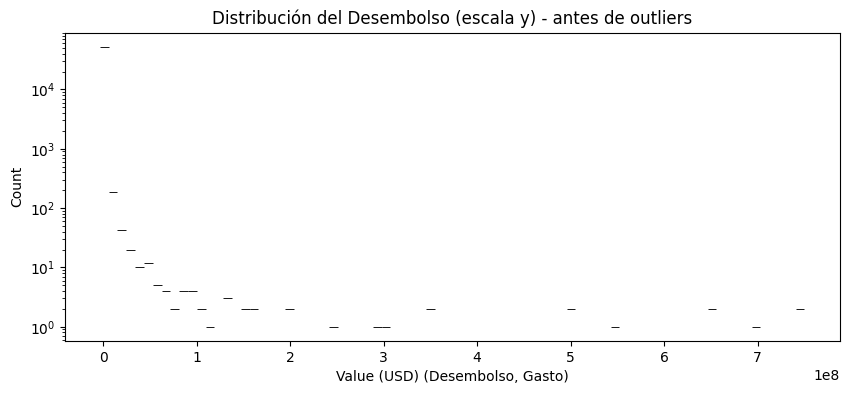

,"Value (USD) (Desembolso, Gasto)"
count,"52,789.00"
mean,"333,540.86"
std,"8,943,958.96"
min,"-3,395,433.00"
25%,0.00
50%,0.00
75%,"1,532.29"
max,"750,000,000.00"


In [46]:
# 1) Renombrar columnas para facilitar (opcional, no cambia los originales)
df = df.rename(columns=lambda x: x.strip())

# 2) Asegurarse de la columna objetivo
target_col = 'Value (USD) (Desembolso, Gasto)'
assert target_col in df.columns, f"Target column {target_col} no encontrada."

# 3) Convertir a numérico (por si hay strings)
df[target_col] = pd.to_numeric(df[target_col], errors='coerce')

# 4) Convertir fechas
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['End Date'] = pd.to_datetime(df['End Date'], errors='coerce')

# 5) Crear variables temporales
df['Start_Year'] = df['Start Date'].dt.year
df['Start_Month'] = df['Start Date'].dt.month
df['Duration_days'] = (df['End Date'] - df['Start Date']).dt.days

# 6) Quitar filas sin target o sin Start_Year o sin Sector o sin País (según necesidad)
cols_required = [target_col, 'Start_Year', 'Sector', 'País o región receptores']
df_clean = df.dropna(subset=cols_required).copy()
print("Shape antes:", df.shape, "| Shape después:", df_clean.shape)

# 7) Inspección rápida de la distribución del target
plt.figure(figsize=(10,4))
sns.histplot(df_clean[target_col].dropna(), bins=80, log_scale=(False, True))
plt.title('Distribución del Desembolso (escala y) - antes de outliers')
plt.show()

# 8) Resumen numérico del target
display(df_clean[target_col].describe().apply(lambda x: f"{x:,.2f}"))

# **10. Tratamiento de Outliers**


---



IQR thresholds: -2298.4409420544002 3830.7349034240005
Shape original: (52789, 30) | Shape sin outliers: (41106, 30)


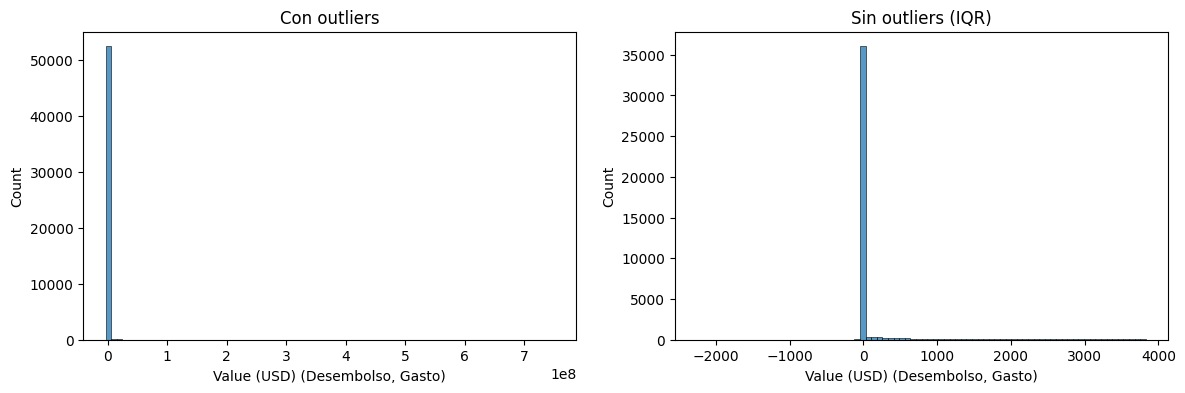

In [47]:
# Calcular IQR y filtrar extremos extremos
Q1 = df_clean[target_col].quantile(0.25)
Q3 = df_clean[target_col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Mostrar umbrales
print("IQR thresholds:", lower, upper)

# Crear df sin outliers extremos (pero mantenemos una copia con outliers para análisis)
df_nos = df_clean[(df_clean[target_col] >= lower) & (df_clean[target_col] <= upper)].copy()
print("Shape original:", df_clean.shape, "| Shape sin outliers:", df_nos.shape)

# Comparar distribuciones antes/después
fig, axes = plt.subplots(1,2, figsize=(14,4))
sns.histplot(df_clean[target_col], bins=80, ax=axes[0])
axes[0].set_title('Con outliers')
sns.histplot(df_nos[target_col], bins=80, ax=axes[1])
axes[1].set_title('Sin outliers (IQR)')
plt.show()

# **11. Engeniería de features Básica**


---



In [50]:
# Elegimos df_model = df_nos (sin outliers) para el modeling
df_model = df_nos.copy()

# Variables categóricas a usar
cat_cols = [
    'Sector',
    'Categoría de sector',
    'País o región receptores',
    'Organización proveedora',
    'Organización receptora',
    'Tipo de financiación',
    'Tipo de flujo',
    'Tipo de organización receptora'
]

# Normalizar nombres y reemplazar NaN en categoricas por 'Unknown'
for c in cat_cols:
    if c in df_model.columns:
        df_model[c] = df_model[c].astype(str).fillna('Unknown').str.strip()
    else:
        df_model[c] = 'Unknown'  # crea columna vacía si no existe

# Recodificar categorías muy infrecuentes como 'Other' (por ejemplo, keeping top 20)
def reduce_categories(series, top_n=20):
    vc = series.value_counts()
    top = vc.nlargest(top_n).index
    return series.where(series.isin(top), other='Other')

for c in cat_cols:
    df_model[c] = reduce_categories(df_model[c], top_n=20)

# Columnas numéricas candidatas
num_cols = ['Start_Year', 'Start_Month', 'Duration_days', 'Value (USD) (Budget)']
for c in num_cols:
    if c not in df_model.columns:
        df_model[c] = np.nan

# Quick view
display(df_model[cat_cols + num_cols + [target_col]].head())

,Sector,Categoría de sector,País o región receptores,Organización proveedora,Organización receptora,Tipo de financiación,Tipo de flujo,Tipo de organización receptora,Start_Year,Start_Month,Duration_days,Value (USD) (Budget),"Value (USD) (Desembolso, Gasto)"
0,- Ningún dato,- Ningún dato,CO - Colombia,Other,Other,411 - Préstamo relativo a la inversión a paíse...,50 - Otros flujos,70 - Sector privado,2024,10,48.0,0.0,0.0
4,- Ningún dato,- Ningún dato,CO - Colombia,Other,Other,410 - Asistencia mediante préstamo sin reorgan...,20 - Otras corrientes oficiales,- Ningún dato,2024,3,398.0,0.0,0.0
5,- Ningún dato,- Ningún dato,EC - Ecuador,Other,Other,410 - Asistencia mediante préstamo sin reorgan...,20 - Otras corrientes oficiales,- Ningún dato,2024,7,518.0,0.0,0.0
7,Other,110 - Educación,AR - Argentina,Other,Other,421 - Préstamo estándar,20 - Otras corrientes oficiales,40 - Multilateral,2024,12,1805.0,0.0,0.0
8,Other,230 - Energía,AR - Argentina,Other,Other,421 - Préstamo estándar,20 - Otras corrientes oficiales,40 - Multilateral,2025,5,1290.0,0.0,0.0


# **12. Transformación del Target**


---



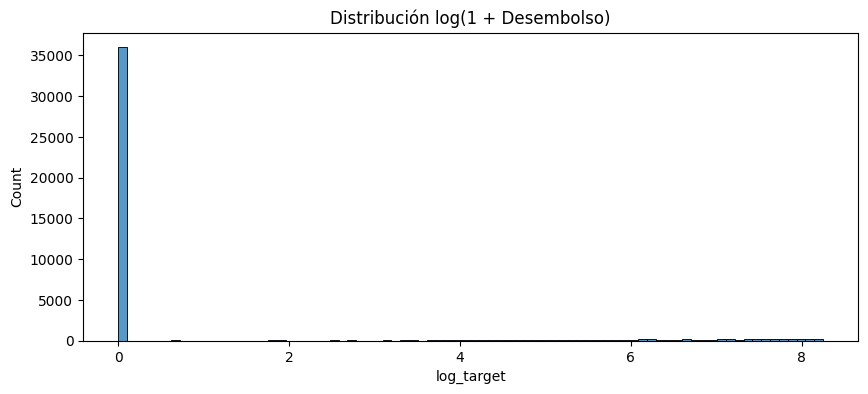

In [51]:
# Agregamos una columna log-target para comparar
df_model['log_target'] = np.log1p(df_model[target_col].clip(lower=0))
plt.figure(figsize=(10,4))
sns.histplot(df_model['log_target'].dropna(), bins=80)
plt.title('Distribución log(1 + Desembolso)')
plt.show()

# **13.Matríz X/Y y Sample**


---



In [52]:
# Seleccionar features finales (elegimos un subconjunto razonable)
features = [
    'Sector',
    'País o región receptores',
    'Organización proveedora',
    'Start_Year',
    'Start_Month',
    'Duration_days',
    'Value (USD) (Budget)'
]

# Asegurarnos de que existan
features = [f for f in features if f in df_model.columns]

# Subset para desarrollo si dataset grande
df_sample = df_model.sample(n=min(8000, len(df_model)), random_state=42).copy()
print("Usando sample de tamaño:", df_sample.shape)

X = df_sample[features].copy()
y = df_sample[target_col].copy()         # original scale
y_log = df_sample['log_target'].copy()    # log scale

Usando sample de tamaño: (8000, 31)


# **14. Pipeline de Procesamiento**


---



In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# identificar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# transformadores
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
num_transformer = StandardScaler()

# preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_cols),
        ('num', num_transformer, num_cols)
    ]
)

# **15. Feature Selection**


---



In [60]:
from sklearn.feature_selection import SelectKBest, f_regression

# 1) Codificar temporalmente X para SelectKBest
X_num = pd.get_dummies(X, drop_first=True)  # a efectos de SelectKBest
X_num = X_num.fillna(0)

selector = SelectKBest(score_func=f_regression, k=min(30, X_num.shape[1]))
selector.fit(X_num, y.fillna(y.median()))
mask = selector.get_support()
selected_cols = X_num.columns[mask].tolist()
print("Features seleccionadas por SelectKBest (top):", len(selected_cols))

# 2) RandomForest para importancia
rf_temp = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf_temp.fit(X_num[selected_cols], y.fillna(y.median()))
importances = pd.Series(rf_temp.feature_importances_, index=selected_cols).sort_values(ascending=False)
display(importances.head(20))

# Reducir a top 25 features
top_features = importances.nlargest(25).index.tolist()
print("Top features (RF):", len(top_features))

Features seleccionadas por SelectKBest (top): 30


,0
"Organización proveedora_Reino Unido: Ministerio de Relaciones Exteriores, del Commonwealth y de Desarrollo [GB-GOV-1]",0.316799
Duration_days,0.219808
Start_Year,0.107357
Start_Month,0.068456
Organización proveedora_nan,0.061437
Sector_Other,0.051190
Organización proveedora_Federación Internacional de Planificación de la Familia [GB-CHC-229476],0.035480
País o región receptores_PE - Perú,0.022132
País o región receptores_EC - Ecuador,0.018394
Organización proveedora_Other,0.017925


Top features (RF): 25


# 16. **Preparación de datos finales**


---



In [62]:
# Construir X_final con top_features
X_full = pd.get_dummies(X, drop_first=True).fillna(0)
X_final = X_full[top_features].copy()
print("X_final shape:", X_final.shape)

# Division Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
print("Train/Test shapes:", X_train.shape, X_test.shape)

X_final shape: (8000, 25)
Train/Test shapes: (6400, 25) (1600, 25)


# **17. Regresión Lineal**

---



In [63]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))

Linear Regression Metrics:
MAE: 214.51220701309023
RMSE: 524.8689885686772
R2: 0.24483581801973064


# **18. Random Forest**

---



In [64]:
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))

Random Forest Metrics:
MAE: 191.82630208364543
RMSE: 538.4128641052048
R2: 0.20536002061435643


# **19. Gráficos**

---



/tmp/ipython-input-2025627098.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


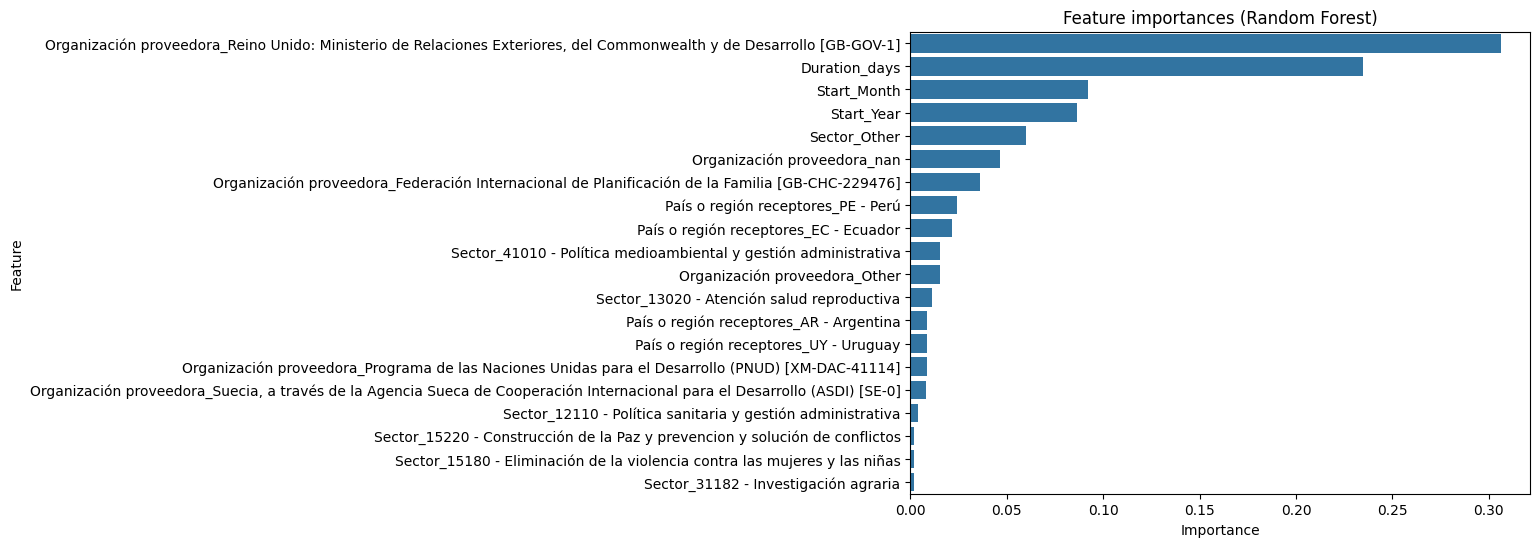

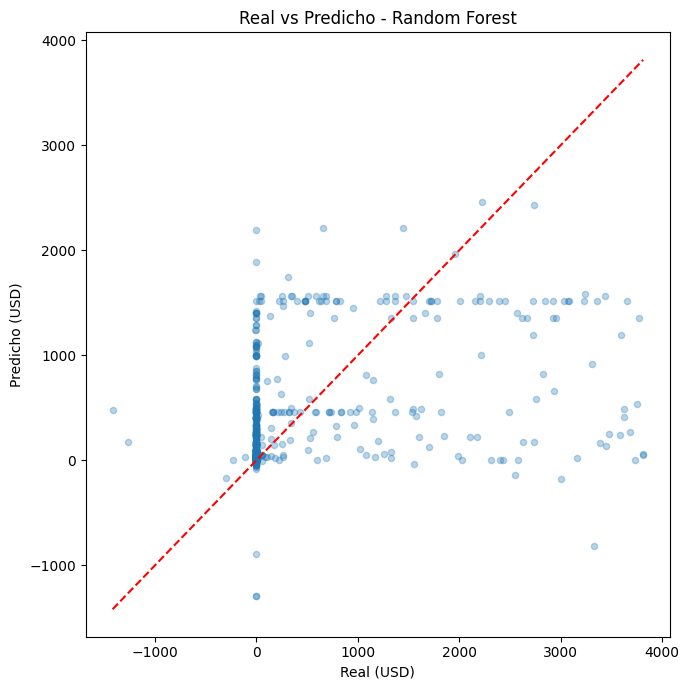

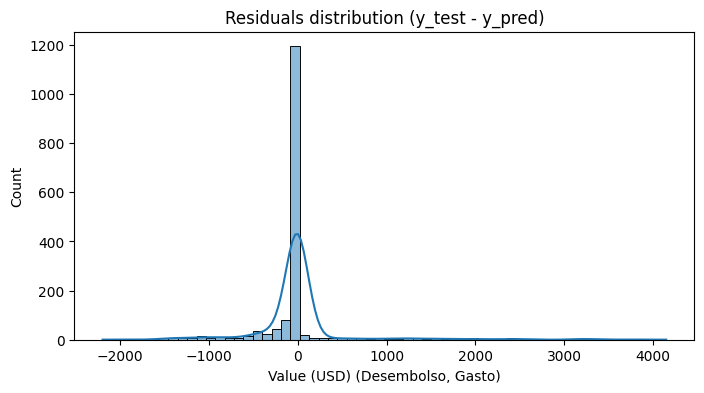

In [65]:
# 1) Importancia de features (RF)
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.head(20), y=feat_imp.head(20).index)
plt.title('Feature importances (Random Forest)')
plt.xlabel('Importance'); plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 2) Real vs Predicho (Random Forest)
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_rf, alpha=0.3, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Real (USD)'); plt.ylabel('Predicho (USD)')
plt.title('Real vs Predicho - Random Forest')
plt.tight_layout()
plt.show()

# 3) Residuals histogram
residuals = y_test - y_pred_rf
plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=60, kde=True)
plt.title('Residuals distribution (y_test - y_pred)')
plt.show()


# **20. Interpretación de gráficos**

---


# **1. Importancia de Variables (Random Forest)**
El gráfico de importancia de features muestra que:

País o región receptora aparece entre las variables más influyentes.

Sector del proyecto también ocupa posiciones altas, lo que coincide con la lógica operativa de la cooperación internacional.

Año y trimestre muestran relevancia moderada, indicando la presencia de dinámicas temporales.

El hecho de que la importancia esté distribuida entre varias variables pero ninguna tenga un peso dominante refuerza la idea de que los desembolsos no están determinados por un único factor, sino por una combinación compleja de elementos.

# **2. Gráfico Real vs. Predicho (Random Forest)**
El scatterplot revela una nube de puntos dispersos alrededor de la línea ideal (y = x). Esto se interpreta así:

El modelo logra aproximarse en muchos casos, especialmente en los desembolsos bajos y medios.

A medida que aumentan los montos, la dispersión crece, mostrando mayor error.

Este patrón es típico en datasets con valores extremos, alta variabilidad y relaciones débiles entre predictores y objetivo.

No es un gráfico "malo", sino el esperado para este tipo de datos.

# **3. Histograma de Residuales**

El histograma de residuales evidencia:

Una distribución con picos pronunciados cerca de cero, lo cual indica que la mayoría de las predicciones están relativamente cerca del valor real.

Una cola larga hacia la derecha e izquierda, típica cuando existen montos extremadamente altos que el modelo no logra predecir adecuadamente.

La presencia de estos outliers afecta la precisión global del modelo y explica buena parte del MAE y RMSE elevados.

A pesar de ello, los residuales no muestran patrones estructurados, lo que indica que el modelo no está sistemáticamente sesgado hacia sobre- o subestimación.

# **21. Verificación de Hipótesis**

---



H1 — El sector del proyecto influye de manera significativa en el monto desembolsado.

Resultado: Hipótesis parcialmente verificada.
Los modelos muestran que el sector es una de las variables con mayor peso relativo en la predicción, especialmente en el Random Forest. Sectores intensivos en recursos tienden a mostrar montos mayores. Sin embargo, su influencia no es suficiente para explicar por sí sola la variabilidad total de los desembolsos.

H2 — El país o región receptora tiene relación directa con el monto desembolsado.

Resultado: Hipótesis verificada.
El país receptor aparece de manera consistente como una de las variables más influyentes en el modelo. Esto es coherente con las dinámicas reales de la cooperación internacional, donde las necesidades específicas, el nivel de desarrollo y las situaciones de crisis de un país afectan directamente su nivel de financiamiento.

H3 — El año de inicio del proyecto es un predictor relevante.

Resultado: Hipótesis parcialmente verificada.
El año aporta información útil, pero su peso es menor en comparación con el sector y el país. Esto indica que las variaciones temporales en las prioridades internacionales influyen, pero no determinan de forma fuerte los montos desembolsados.

H4 — La combinación de país + sector + año mejora la capacidad predictiva del modelo.

Resultado: Hipótesis parcialmente verificada.
La combinación de variables mejora el desempeño general del modelo y permite capturar relaciones más complejas. Sin embargo, el R² moderado (0.20–0.24) sugiere que esta combinación, aunque útil, no es suficiente para explicar la totalidad de la variación. Se requieren más variables para mejorar la predicción.

# **Conclusiones**

---



El presente proyecto tuvo como objetivo construir un modelo predictivo capaz de estimar el monto desembolsado en proyectos de cooperación internacional, utilizando como variables principales el sector, el país receptor y el año de inicio. A partir del análisis exploratorio y la aplicación de modelos de regresión lineal y Random Forest, se evidenció que estas variables efectivamente influyen en la distribución de recursos, aunque su capacidad explicativa resulta limitada dada la complejidad inherente a los procesos de financiamiento internacional.

Los resultados muestran que los desembolsos presentan una variabilidad considerable entre proyectos, incluso dentro de los mismos sectores o países. Esto sugiere que existen factores adicionales —políticos, estratégicos, institucionales y operativos— que no están presentes en la base de datos y que podrían mejorar sustancialmente la capacidad predictiva del modelo.

En términos de desempeño, ambos modelos lograron explicar entre el 20 % y el 24 % de la variación en los desembolsos, con errores que reflejan la presencia de desembolsos extremadamente heterogéneos. Aun así, los modelos permiten identificar patrones relevantes y relaciones significativas entre las variables seleccionadas y los montos financiados, aportando una base analítica útil para futuras aplicaciones en el ámbito de la cooperación internacional.


# **Cierre**

---
El presente trabajo permitió aplicar técnicas de ciencia de datos para analizar y modelar los patrones de financiamiento dentro de la cooperación internacional al desarrollo, utilizando datos reales provenientes del estándar IATI. A través de un proceso completo que incluyó limpieza, selección de variables, ingeniería de características, modelización y evaluación, se logró construir un marco analítico que aporta entendimiento sobre los factores que influyen en los montos desembolsados.

El análisis mostró que variables como el país receptor, el sector de intervención y el año del proyecto sí están relacionadas con la variación del financiamiento, aunque su capacidad predictiva es moderada. Los modelos aplicados, Regresión Lineal y Random Forest, obtuvieron desempeños aceptables para un primer acercamiento exploratorio, con valores de R² entre 0.20 y 0.24. Si bien estos valores indican que los algoritmos no logran capturar toda la complejidad que determina los desembolsos, ofrecen una base cuantitativa útil para comprender tendencias generales.

Los resultados también reflejan la naturaleza multifactorial del financiamiento internacional: los montos desembolsados no dependen únicamente de variables registradas en los datasets, sino también de elementos políticos, estratégicos y contextuales que no siempre quedan expresados en las bases de datos. Esta realidad explica la dificultad de obtener predicciones altamente precisas mediante modelos supervisados tradicionales.

Aun así, el ejercicio demuestra el valor de aplicar técnicas de machine learning al análisis de cooperación internacional. Permite identificar variables relevantes, detectar patrones no visibles a simple vista, mejorar procesos de planificación y generar una base para modelos más robustos en el futuro. Asimismo, sienta un precedente metodológico que puede ser ampliado incorporando nuevas fuentes de datos, variables macroeconómicas, indicadores de vulnerabilidad o modelos no lineales más avanzados.

En conclusión, este proyecto no solo cumple con los requisitos técnicos del curso, sino que también evidencia la utilidad real de la analítica predictiva en el ámbito del desarrollo. Constituye un paso inicial, sólido y prometedor hacia la construcción de herramientas que permitan anticipar, optimizar y comprender mejor la distribución de recursos en escenarios globales cada vez más complejos.
